# Exploratory Data Analysis
---


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [37]:
# load data

bbox_df = pd.read_pickle('../data/interim/bbox_df.pkl')
data_entry_df = pd.read_pickle('../data/interim/data_entry_df.pkl')
patient_data = pd.read_pickle('../data/interim/patient_data.pkl')

In [3]:
data_entry_df.head()

,image_index,finding_labels,follow_up_number,patient_id,patient_age,patient_gender,view_position,original_img_width,original_img_height,img_pixel_spacing_x,img_pixel_spacing_y
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143


In [63]:
data_entry_df["patient_id"].nunique()

30802

In [62]:
patient_data.head()

image_index          finding_labels  \
patient_id follow_up_number                                             
1          0                 00000001_000.png            Cardiomegaly   
           1                 00000001_001.png  Cardiomegaly|Emphysema   
           2                 00000001_002.png   Cardiomegaly|Effusion   
2          0                 00000002_000.png              No Finding   
3          0                 00000003_000.png                  Hernia   

                             patient_age patient_gender view_position  
patient_id follow_up_number                                            
1          0                          58              M            PA  
           1                          58              M            PA  
           2                          58              M            PA  
2          0                          81              M            PA  
3          0                          81              F            PA

In [83]:
x = patient_data.loc[1]
x

,image_index,finding_labels,patient_age,patient_gender,view_position
follow_up_number,,,,,
0,00000001_000.png,Cardiomegaly,58,M,PA
1,00000001_001.png,Cardiomegaly|Emphysema,58,M,PA
2,00000001_002.png,Cardiomegaly|Effusion,58,M,PA


note: update graphs with patient_data

In [ ]:
# reset index  

flat_df = patient_data.reset_index()
flat_df.head()

,patient_id,follow_up_number,image_index,finding_labels,patient_age,patient_gender,view_position
0,1,0,00000001_000.png,Cardiomegaly,58,M,PA
1,1,1,00000001_001.png,Cardiomegaly|Emphysema,58,M,PA
2,1,2,00000001_002.png,Cardiomegaly|Effusion,58,M,PA
3,2,0,00000002_000.png,No Finding,81,M,PA
4,3,0,00000003_000.png,Hernia,81,F,PA


Average patient age: 46.09


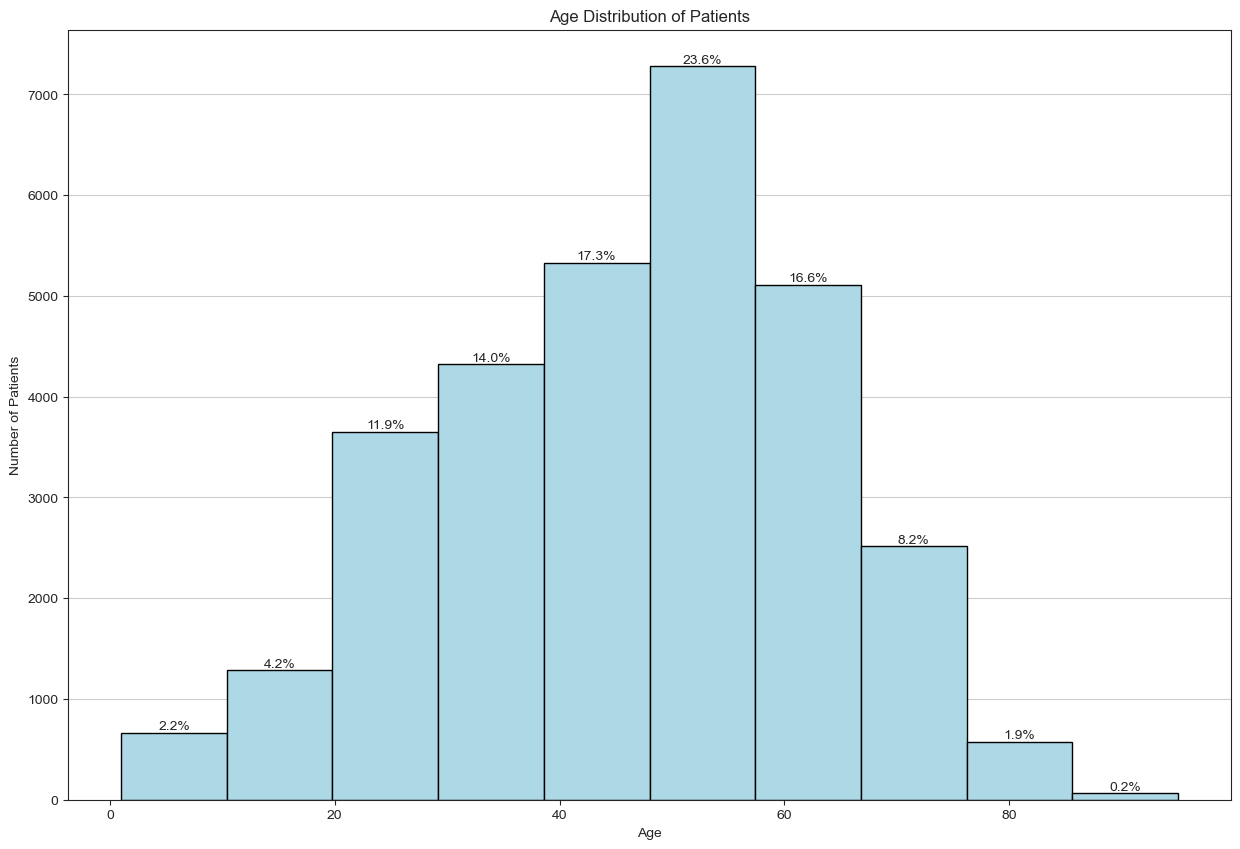

In [ ]:
# age distribution of patients

# extracted the age of each unique patient
patient_ages = flat_df.groupby("patient_id")["patient_age"].first()

# calculated the average patient age
print(f'Average patient age: {patient_ages.mean().round(2)}')

# plotted histogram 
plt.figure(figsize=(15,10))
counts, bins, patches = plt.hist(patient_ages, bins=10, color="lightblue",edgecolor="black")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")

total = counts.sum()
percentages = [f"{(c/total * 100):.1f}%" for c in counts]

plt.bar_label(patches, labels=percentages)
plt.grid(axis='y')
plt.show()

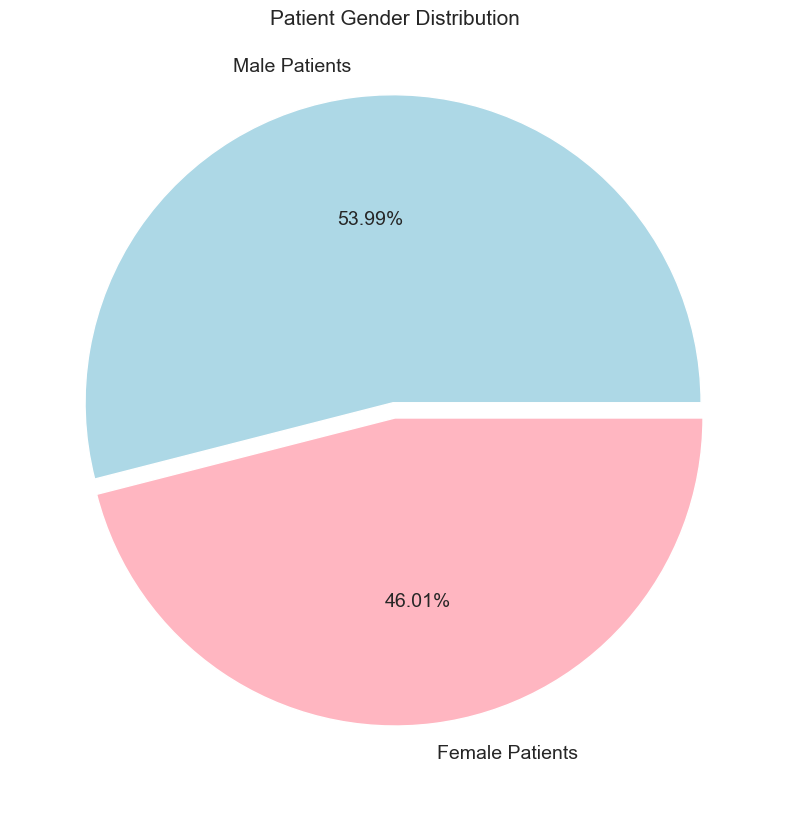

In [ ]:
# Patient gender distribution

# extracted gender of each unique patient
patient_gender = flat_df.groupby("patient_id")["patient_gender"].first()
gender = patient_gender.value_counts()

# plot pie chart
plt.figure(figsize=(15,10))
plt.pie(gender.values, labels=["Male Patients", "Female Patients"], autopct="%.2f%%", explode=[0.05,0], colors=["lightblue", "lightpink"], textprops={"fontsize": 14})
plt.title("Patient Gender Distribution", fontsize=15)
plt.show()

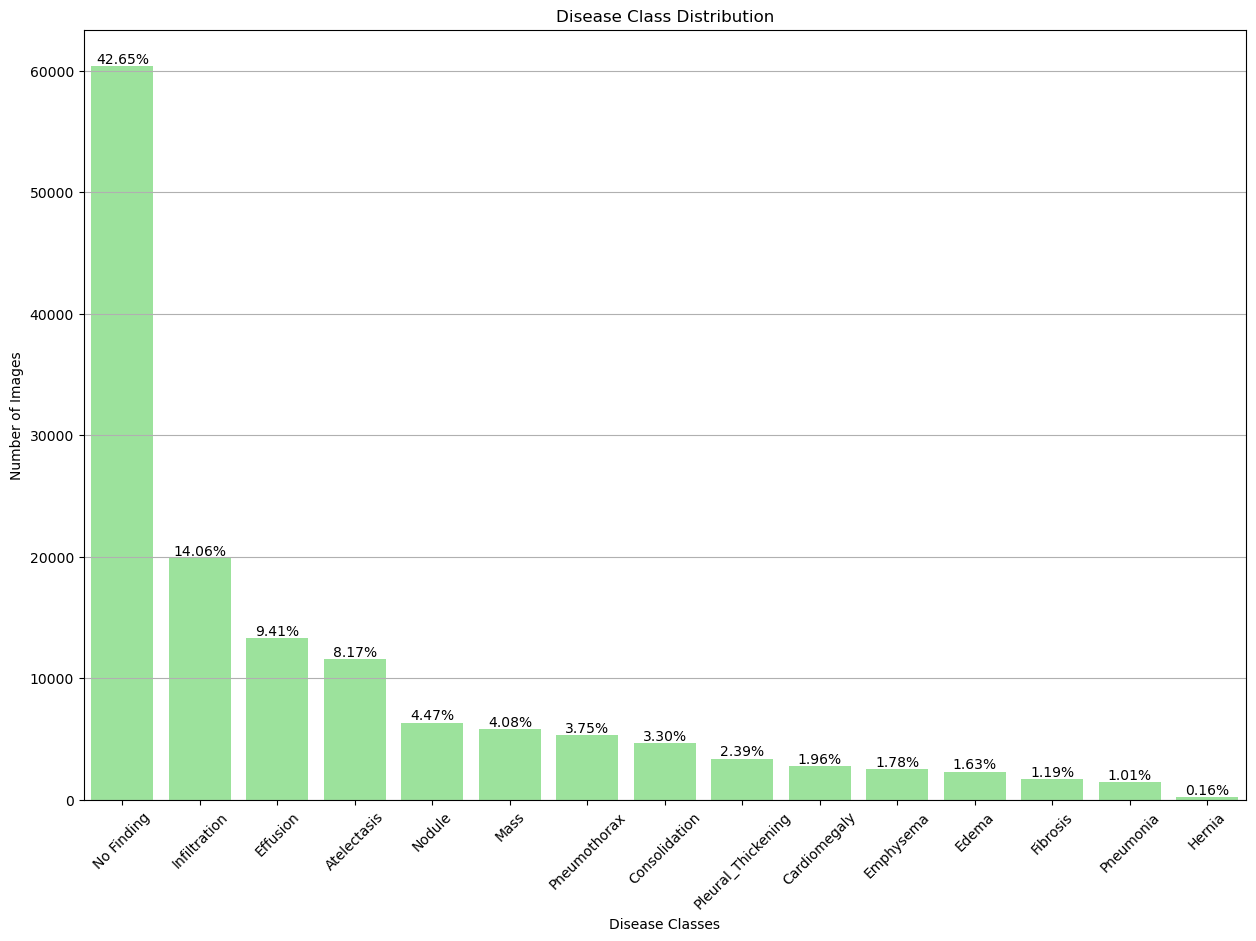

In [ ]:
# Distribution of disease classes
# Did not extract for each unique patient

labels_exploded = data_entry_df["finding_labels"].str.split('|').explode()
label_counts = labels_exploded.value_counts()

plt.figure(figsize=(15,10))
sns.barplot(x=label_counts.index, y=label_counts.values, color="lightgreen")
plt.xticks(rotation=45)
plt.title("Disease Class Distribution")
plt.xlabel("Disease Classes")
plt.ylabel("Number of Images")

total = label_counts.sum()

for index, count in enumerate(label_counts.values):
    percentage = (count/ total) * 100
    plt.text(index, count + 2, f'{percentage:.2f}%', ha='center', va='bottom')

plt.grid(axis='y')
plt.show()

The distribution of classes is left-skewed with a dominate class ("No Finding"). The gap between the top class the the next may have a large impact on model performance as models tend to bias the majority class. 